In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

Generating a Random Medium in Python

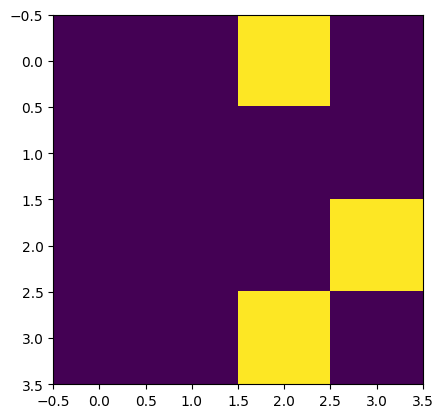

In [3]:
#The cells are filled with probability p
p = 0.25
#A 4x4 random matrix of uniform random numbers between 0 and 1.
z = np.random.rand(4,4)
#A site is set if z<p, and it is empty otherwise.
m = z<p
#Displays the data as an image.
plt.imshow(m)

Here is an array which tells us which cluster each site in the system belongs to. All the sites with the same index number belong to the same cluster.

In [27]:
lw, num = ndimage.label(m)
lw

array([[0, 0, 1, 0],
       [0, 0, 0, 2],
       [0, 0, 0, 0],
       [3, 3, 0, 4]], dtype=int32)

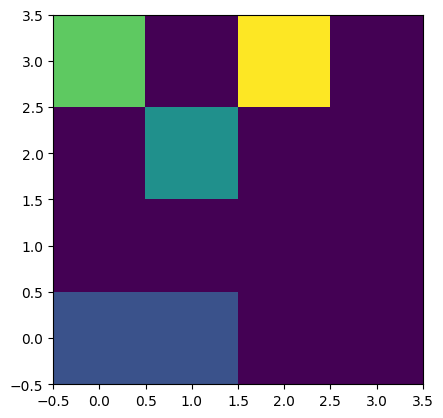

In [18]:
#In order to visualise the clusters effectively, we give the various clusters different colours.
plt.imshow(lw, origin='lower')

Here, the clusters are coloured gradually from the bottom up, so clusters that are close to each other will get similar colours and can therefore be difficult to discern unless we shuffle the colourmap. We can fix this by shuffling the labeling.

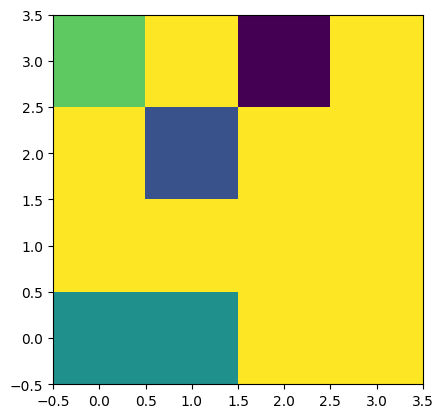

In [21]:
#np.arange returns evenly spaced values within a given interval.
#Here it returns evenly spaced values from 0 to lw.max()
b = np.arange(lw.max() + 1)
#np.random.shuffle modifies a sequence in-place by shuffling its contents.
np.random.shuffle(b)
#Replaces each element of lw with its corresponding shuffled element in b.
shuffledLw = b[lw]
plt.imshow(shuffledLw, origin='lower')

It may also be useful to colour the clusters based on the size of the clusters, where size refers to the number of sites in a cluster.

[[False False  True False]
 [False False False  True]
 [False False False False]
 [ True  True False  True]]
[[0 0 1 0]
 [0 0 0 2]
 [0 0 0 0]
 [3 3 0 4]]
[0 1 2 3 4]
[0. 1. 1. 2. 1.]


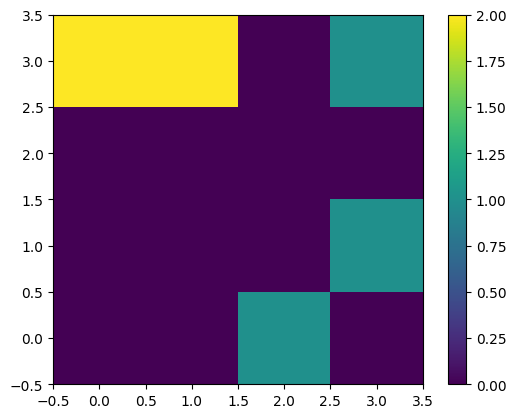

In [30]:
#lw assigns labels to each value in m. index gives a sequence of label numbers of the objects to be measured.
#m is the True or False Matrix
#area gives a 1 x L array of the sizes of each cluster
area = ndimage.sum(m, lw, index=np.arange(lw.max() + 1))
print(m)
print(lw)
print(np.arange(lw.max() + 1))
print(area)
areaImg = area[lw]
plt.imshow(areaImg, origin='lower')
plt.colorbar()

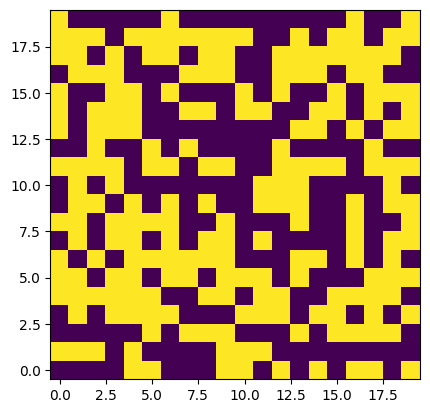

In [31]:
# The length of the lattice
L = 20
#The probability that a site is occupied
p = 0.5
#Creates an LxL array and populates it with random samples from a uniform distribution over [0,1)
z = np.random.rand(L,L)
#Creates an LxL array, giving cells that have a value lower than p the value "True" and the others "False". The cells with the value "True" are set/filled and the others are empty. The occupied sites are holes in the porous material.
m = z<p
#origin='lower' places the [0,0] index of the array in the lower left corner of the Axes.
plt.imshow(m, origin='lower')